Linear Regression:

<b> Y = wX + b </b>

Y -->  Dependent variable  
X --> Independent variable  
w --> weight  
b --> bias


<b>Gradient Descent</b>

Gradient Descent is an optimizing algorithm used for minimizing the loss function in various machine learning algorithms.It is used for updating the parameters of the learning model

w = w - a*dw  
b = b - a*db

<b>Learning rate</b>

Learning rate is a tuning parameter in an optimization algorithm that determines the step size at each iteration while moving toward a minimum of a loss function.

In [31]:
#importing the numpy library
import numpy as np

**Linear Regression**

In [3]:
class Linear_Regression:
    # Initiating the parameters(learning rate and the epochs)
    def __init__(self,learning_rate,epochs):
        self.learning_rate=learning_rate
        self.epochs=epochs


    def fit(self,X,Y):
        # Number of training examples & number of features

        self.m,self.n=X.shape #Number of rows and columns
        # initiating the weight and bias of our model

        self.w=np.zeros(self.n)
        self.b=0
        self.X=X
        self.Y=Y

        # Implementing gradient descend

        for i in range(self.epochs):
            self.update_weights()

    def update_weights(self):
        Y_prediction = self.predict(self.X)

        # calculate gradient
        dw = -(2*(self.X.T).dot(self.Y - Y_prediction))/self.m
        db = -2*np.sum(self.Y -Y_prediction)/self.m

        # Updating the weights
        self.w=self.w -self.learning_rate*dw
        self.b=self.b - self.learning_rate*db

    def predict(self,X):
        return X.dot(self.w) + self.b
        


## **Workflow of the linear regression model**
**Step 1:** Set learning rates and the number of iterations. Initiate random weights and values  
**Step 2:** Build the linear regression equation . (Y = wX + b)  
**Step 3:** Find the "Y pred" value for given x value for the corressponding weights and biases  
**Step 4:** Check the loss function for these parameter values  
**Step 5:** Update the parameter values using gradient descent  
**Step 6:** Step 3,4,5 are repeated till we get a minimum loss function  

Finally we will get the best model (best weight and bias) as it has minimum loss function

Using the linear regression model for prediction

In [33]:
# importing the dependencies
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

Data Pre processing

In [34]:
# Loding the data from a csv file to a pandas dataframe
salary_data = pd.read_csv('salary_data.csv')

In [35]:
# printing the first 5 columns in the dataframe
salary_data.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [36]:
# print the number of rows and cols in the dataframe
salary_data.shape

(30, 2)

In [37]:
# checking for missing values
salary_data.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [38]:
# splitting the feature and target
X = salary_data.iloc[:,:-1].values
Y=salary_data.iloc[:,1].values

In [39]:
print(X)
print(Y)

[[ 1.1]
 [ 1.3]
 [ 1.5]
 [ 2. ]
 [ 2.2]
 [ 2.9]
 [ 3. ]
 [ 3.2]
 [ 3.2]
 [ 3.7]
 [ 3.9]
 [ 4. ]
 [ 4. ]
 [ 4.1]
 [ 4.5]
 [ 4.9]
 [ 5.1]
 [ 5.3]
 [ 5.9]
 [ 6. ]
 [ 6.8]
 [ 7.1]
 [ 7.9]
 [ 8.2]
 [ 8.7]
 [ 9. ]
 [ 9.5]
 [ 9.6]
 [10.3]
 [10.5]]
[ 39343  46205  37731  43525  39891  56642  60150  54445  64445  57189
  63218  55794  56957  57081  61111  67938  66029  83088  81363  93940
  91738  98273 101302 113812 109431 105582 116969 112635 122391 121872]


Splitting the data into training data and test data

In [40]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.33,random_state=2)

Training the linear regression model

In [70]:
model = Linear_Regression(learning_rate=0.02,epochs=1000)

In [71]:
model.fit(X_train,Y_train)

In [72]:
# printing the parameter values (weights and biases)
print('weight = ',model.w[0])
print('biases = ',model.b)

weight =  9514.400999035135
biases =  23697.406507136307


Predict the salary value for test data

In [73]:
test_data_prediction = model.predict(X_test)

In [74]:
print(X_test)

[[1.3]
 [1.1]
 [4.5]
 [3.7]
 [7.1]
 [6. ]
 [8.2]
 [3. ]
 [2. ]
 [6.8]]


Visualizing the predicted values and the actual values

Text(0.5, 1.0, ' Salary vs Work experience')

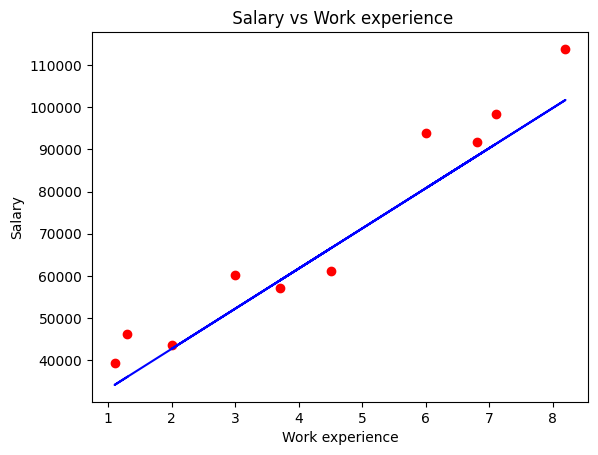

In [75]:
plt.scatter(X_test,Y_test,color='red')
plt.plot(X_test,test_data_prediction,color='blue')
plt.xlabel("Work experience")
plt.ylabel("Salary")
plt.title(" Salary vs Work experience")